# Statistical Analysis on Insurance Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [140]:
df.shape

(1338, 7)

In [141]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [142]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [143]:
df.describe().astype(int)

,age,bmi,children,charges
count,1338,1338,1338,1338
mean,39,30,1,13270
std,14,6,1,12110
min,18,15,0,1121
25%,27,26,0,4740
50%,39,30,1,9382
75%,51,34,2,16639
max,64,53,5,63770


# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Text(0.5, 1.0, 'Charges Distribution')

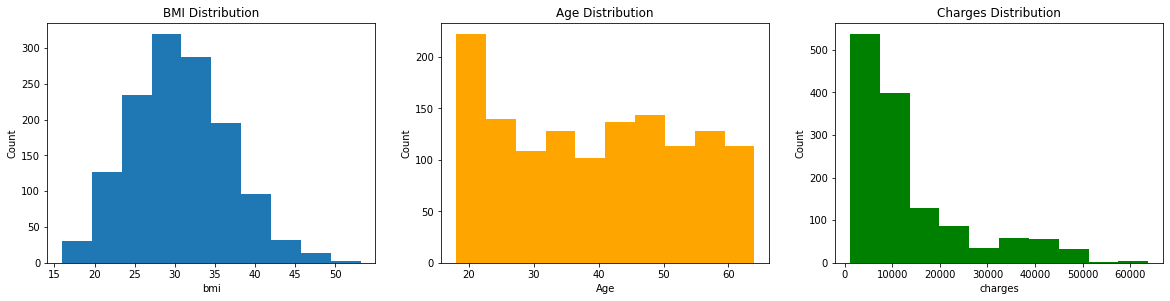

In [144]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['bmi'])
plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.subplot(3,3,2)
plt.hist(df['age'],color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.subplot(3,3,3)
plt.hist(df['charges'],color='green')
plt.xlabel('charges')
plt.ylabel('Count')
plt.title('Charges Distribution')


In [145]:
pd.DataFrame({'Skewness':[stats.skew(df['bmi']),stats.skew(df['age']),stats.skew(df['charges'])]},index=['BMI','Age','Charges'])

,Skewness
BMI,0.283729
Age,0.055610
Charges,1.514180


#### 1.Where BMI attribute data points are normally distributed(It more like a normal distribution)
#### 2.Where Age Attribute data points are uniformly distributed and but some skewness is there.
#### 3.Where Charges Attribute data points are strongly we can tell that right skewd or positve skewed.

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

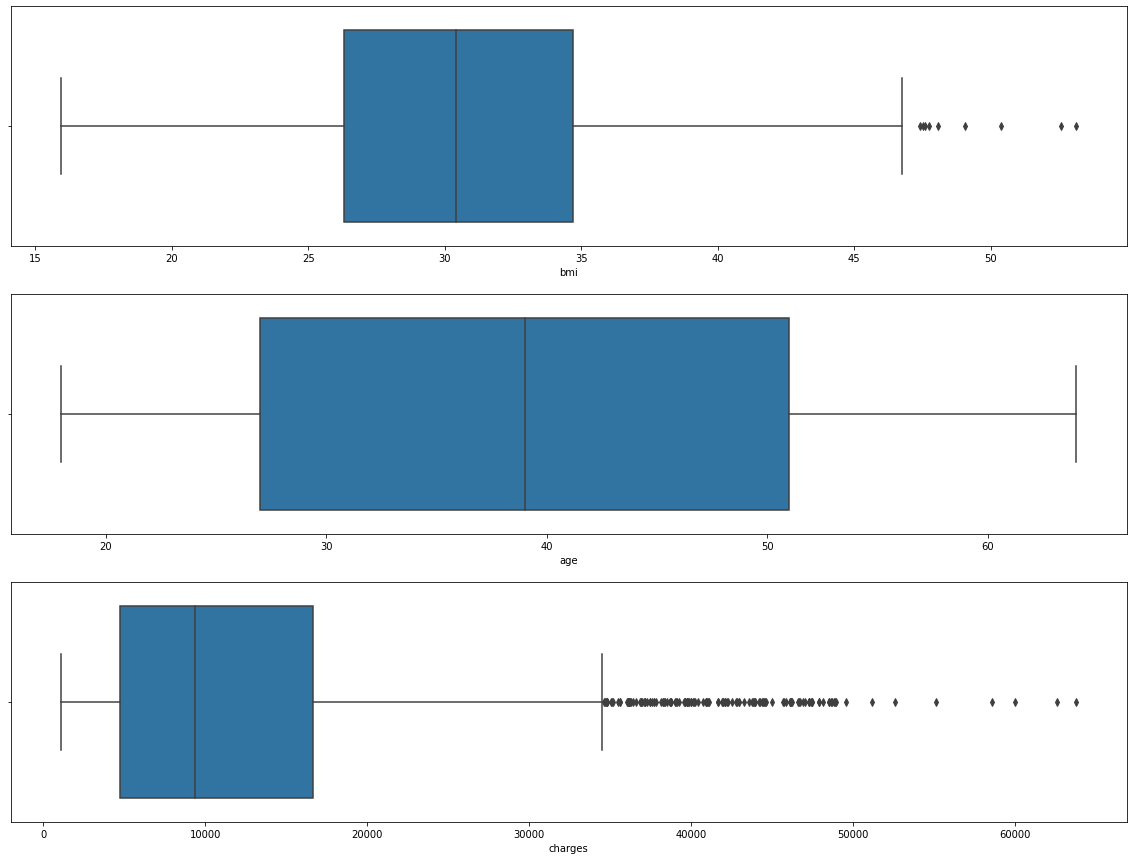

In [146]:

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df['bmi'])


plt.subplot(3,1,2)
sns.boxplot(x=df['age'])

plt.subplot(3,1,3)
sns.boxplot(x=df['charges'])
plt.show()

#### 1.Where in BMI attribute some outliers are there or extereme values are there.
#### 2.Where in Age Attribute there is no outliers .
#### 3.Where in Charges Attribute more outliers are there .

# Distribution of categorical columns

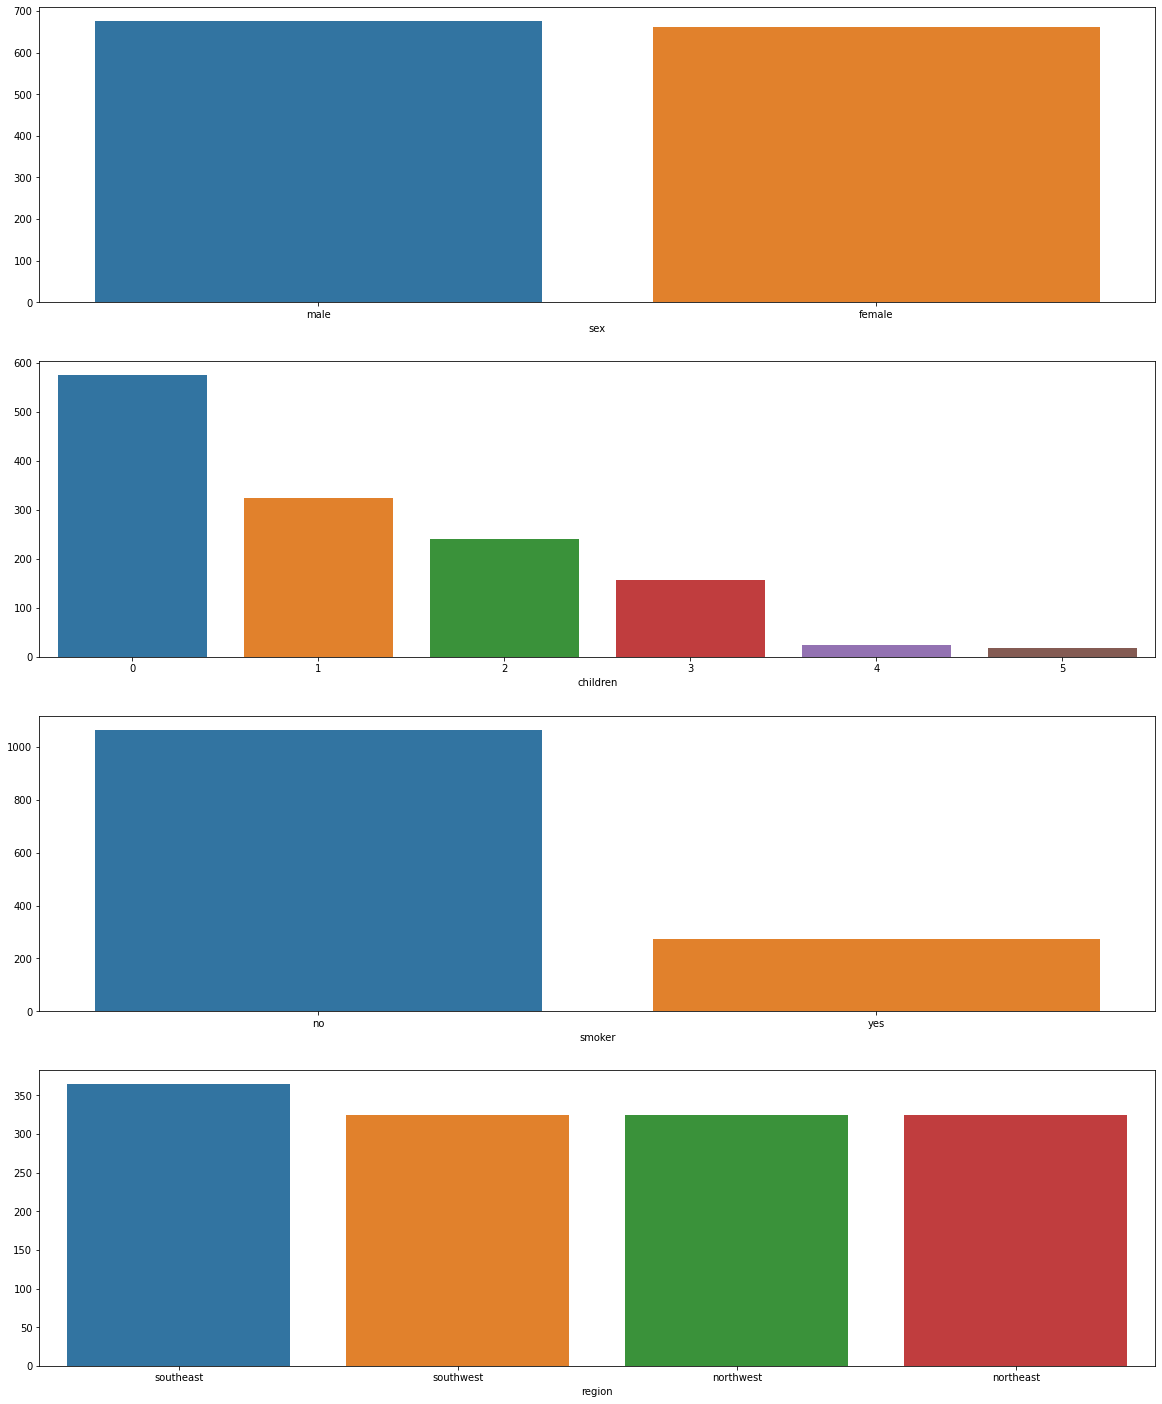

In [147]:
plt.figure(figsize= (20,25))
plt.subplot(4,1,1)
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts().values)

plt.subplot(4,1,2)
sns.barplot(x=df['children'].value_counts().index,y=df['children'].value_counts().values)

plt.subplot(4,1,3)
sns.barplot(x=df['smoker'].value_counts().index,y=df['smoker'].value_counts().values)

plt.subplot(4,1,4)
sns.barplot(x=df['region'].value_counts().index,y=df['region'].value_counts().values)
plt.show()

# Finding Correlations between all columns in the dataframe.

### Note : Categorical variables or variables with non-numeric values cannot be directly used to compute correlation coefficients. In such cases, you would need to transform the categorical variables into numerical representations or use other statistical techniques suitable for analyzing categorical data.

In [151]:
temp_df=df.copy()

In [152]:
region={'southwest':0, 'southeast':1,'northwest':2,'northeast':3}

In [153]:
temp_df['sex']=temp_df['sex'].apply(lambda x :1 if x=='male' else 0 )
temp_df['region']=temp_df['region'].map(region)
temp_df['smoker']=temp_df['smoker'].apply(lambda x :1 if x=='yes' else 0)

In [154]:
temp_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [159]:
print(temp_df['sex'].unique(),temp_df['smoker'].unique(),temp_df['region'].unique())

[0 1] [1 0] [0 1 2 3]


In [161]:
corr_matrix=temp_df.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<AxesSubplot:>

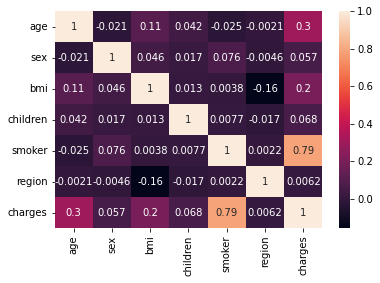

In [254]:
sns.heatmap(corr_matrix,annot=True)

#### Overall, the strongest correlation is observed between smoking status and charges, indicating that smoking is a significant factor influencing insurance costs. Age and BMI also show some positive correlation with charges, while sex and region have relatively weak correlations. The number of children has a slight positive correlation but is not as influential as other factors.

# Hypothesis Testing

### Do charges of people who smoke differ significantly from the people who don't?

In [166]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

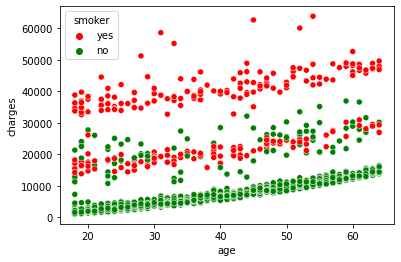

In [168]:
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'],palette= ['red','green'])

In [172]:
Ho='Charges of non-smoker and smoker are same' # 
Ha='Charges of non-smoker and smoker are not same'
x=np.array(df[df['smoker']=='yes']['charges'])
y=np.array(df[df['smoker']=='no']['charges'])
t_value,p_value=stats.ttest_ind(x,y)
if p_value<=0.05:
    print('{} becaz the (p_value){}<=0.05'.format(Ha,p_value))
else:
    print('{} becaz the (p_value){}>0.05'.format(Ho,p_value))

Charges of non-smoker and smoker are not same becaz the (p_value)8.271435842179102e-283<=0.05


### Does bmi of males differ significantly from that of females?

In [173]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='bmi'>

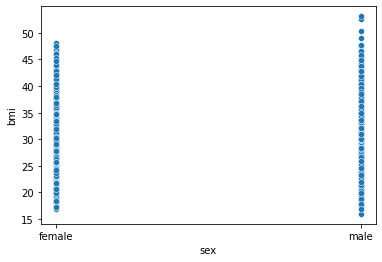

In [174]:
sns.scatterplot(x=df['sex'],y=df['bmi'])

#### Null Hypothesis : Tells that there is no significant relationship between Two variables(Just assumptions)
#### Alternate Hypothesis: Opposite of Null Hypothesis , Tells that There is a relationship between two variables.(Just assumptions)
#### p_value <= 0.5 null hypothesis is rejected otherwise alternate hypothesis is rejected.

In [255]:
Ho='Gender has no effect on bmi' # Stating the Null Hypothesis
Ha='Gender has an effect on bmi' # Stating the Alternate Hypothesis
x=np.array(df[df['sex']=='male']['bmi'])
y=np.array(df[df['sex']=='female']['bmi'])
t_value,p_value=stats.ttest_ind(x,y) # ttest is to identify the difference between two numerical variables.
if p_value<=0.05: 
    print('{} becaz the (p_value){}<=0.05'.format(Ha,p_value))
else:
    print('{} becaz the (p_value){}>0.05'.format(Ho,p_value))

Gender has no effect on bmi becaz the (p_value)0.08997637178984934>0.05


### Is the proportion of smokers significantly different in different genders?

In [264]:
freq_df=pd.crosstab(df['sex'],df['smoker'])
freq_df

smoker,no,yes
sex,,
female,547,115
male,517,159


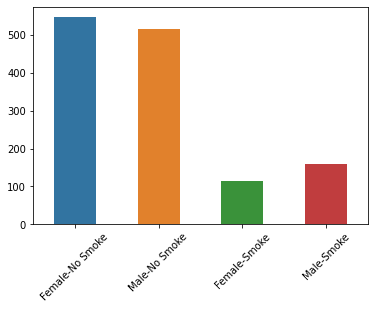

In [257]:
chances=['Female-No Smoke','Male-No Smoke','Female-Smoke','Male-Smoke']
counts=freq_df.loc[:,'no'].tolist()+freq_df.loc[:,'yes'].tolist()
sns.barplot(x=chances,y=counts,width=0.5)
plt.xticks(rotation=45)
plt.show()

In [258]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis
chi, p_value, dof, expected =  stats.chi2_contingency(freq_df) # chi2 test is to identify the difference between categorical
if p_value <= 0.05:                                                                                             # variables.
     print('{} becaz the (p_value){}<=0.05'.format(Ha,p_value))
else:
    print('{} becaz the (p_value){}>0.05'.format(Ho,p_value))
    

Gender has an effect on smoking habits becaz the (p_value)0.006548143503580696<=0.05


### Is the distribution of bmi across women with no children, one child and two children,etc . Are they same ?

In [259]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [263]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df=df[df['sex']=='female'].copy()

zero_child = female_df[female_df['children'] == 0]['bmi']
one_child = female_df[female_df['children'] == 1]['bmi']
two_child = female_df[female_df['children'] == 2]['bmi']
three_child = female_df[female_df['children'] == 3]['bmi']
four_child = female_df[female_df['children'] == 4]['bmi']
five_child = female_df[female_df['children']== 5]['bmi']
f_stat, p_value = stats.f_oneway(zero_child,one_child,two_child,three_child,four_child,five_child)
if p_value <= 0.05: # oneway test or f-test is used to identify the difference between multiple numerical varaibles.
     print('{} becaz the (p_value){}<=0.05'.format(Ha,p_value))
else:
    print('{} becaz the (p_value){}>0.05'.format(Ho,p_value))

No. of children has no effect on bmi becaz the (p_value)0.918622806533995>0.05
